<a href="https://colab.research.google.com/github/Jonida-Zekaj/Image-Processing-with-OpenCV/blob/main/(LADV)Homework3_Zekaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INSTALLING AND IMPORTING NECESSARY LIBRARIES**


In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
import cv2 #as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

#**UPLOADING IMAGE FROM GOOGLE DRIVE CONTENT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Connecting to the Google Drive Account

Mounted at /content/drive


In [ ]:
img=cv2.imread('/content/drive/MyDrive/RGBImage.jpg',cv2.IMREAD_COLOR)
if img is None:
  print("Error: Image was not loaded properly!")
else:
  print("Success: Image has been loaded successfully!")
  print(img)

Success: Image has been loaded successfully!
[[[  1 229 246]
  [  0 228 245]
  [  0 228 245]
  ...
  [109 138 152]
  [ 95 118 126]
  [ 96 114 121]]

 [[  1 229 246]
  [  1 229 246]
  [  0 228 245]
  ...
  [ 94 125 140]
  [ 96 122 128]
  [102 130 117]]

 [[  1 229 246]
  [  1 229 246]
  [  1 229 246]
  ...
  [ 96 132 148]
  [110 138 139]
  [113 147 130]]

 ...

 [[200 157 108]
  [202 150  97]
  [206 145  83]
  ...
  [206 227 229]
  [210 229 236]
  [207 229 235]]

 [[190 139  89]
  [193 137  82]
  [203 142  80]
  ...
  [196 218 223]
  [198 218 229]
  [207 226 234]]

 [[184 131  50]
  [181 125  46]
  [196 137  58]
  ...
  [196 218 223]
  [195 215 226]
  [194 213 221]]]


#**FIRST: CONVERT IMAGE FROM RGB TO BGR**

The image I selected is RGB. However, OpenCV works specifically with BGR images so the current image should be altered to fit that standard.

\\
The difference between the two is that RGB reads images with the red channel first, then green and so on, whereas BGR reads images with the blue  channel first.

\\
Example:

**RGB** : [255, 0, 0]
Results to pure red pixeled images.
("Red channels are read FIRST")

**BGR** : [255, 0, 0]
Results to pure blue pixeled images.
("Blue channels are read FIRST")

In [ ]:
bgr_img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

RGB Image


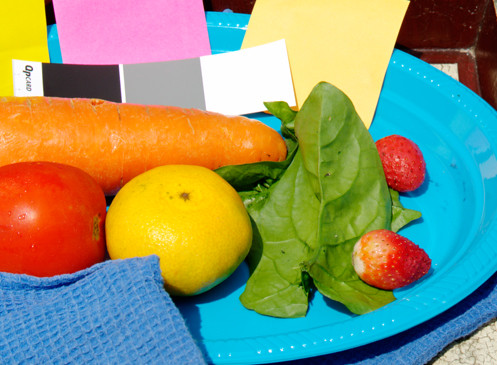


BGR Image


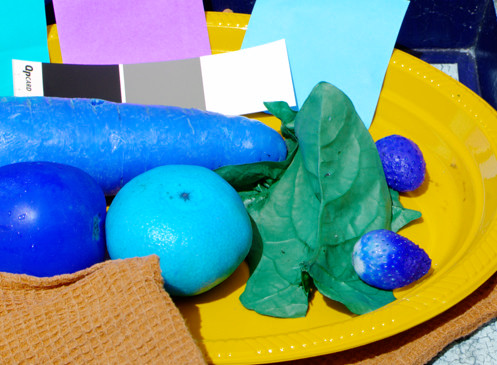

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
# Displaying Images
print("RGB Image")
cv2_imshow(img)
print("\nBGR Image")
cv2_imshow(bgr_img)

#**SECOND: CONVERTING TO HSV**

**HSV IMAGES**

**H**=Hue  [0 - 179]

*Representation of light wavelengths.*

**S**=Saturation  [0 - 255]

*Representation of the vibrance and intensity of the appearing colors*

**V**=(Brightness) Value   [0 - 255]

*Evaluation of the brightness or the darkness of a color*




HSV Image


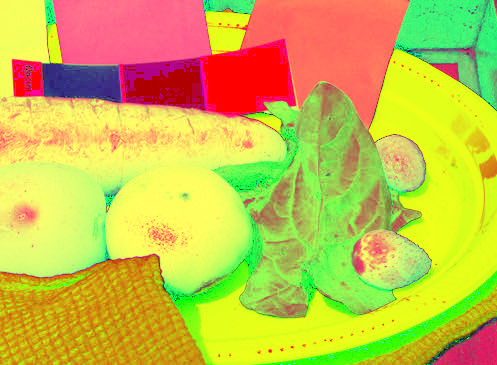

In [ ]:
hsv_img=cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV) #Converting to HSV
#"cv2.COLOR_BGR2HSV" is an OpenCV Conversion Flag
print("\nHSV Image")
cv2_imshow(hsv_img) #Display the HSV image

#**BINARY MASK FOR COLOR DETECTION**

A **binary mask** is a data structure used to process or manipulate a larger dataset by evaluationg each pixel with:

**White**: [1] or [255 pixels]

or

**Black**: [0] or [0 pixels]

In a colorful image, each color has a range of HSV values. There ranges are defined by specifying their lower and upper limit.

To acheive this you refer to the HSV Color Cone.

Search the specific hue, saturation and brightness values of the SELECTED COLOR.

\\
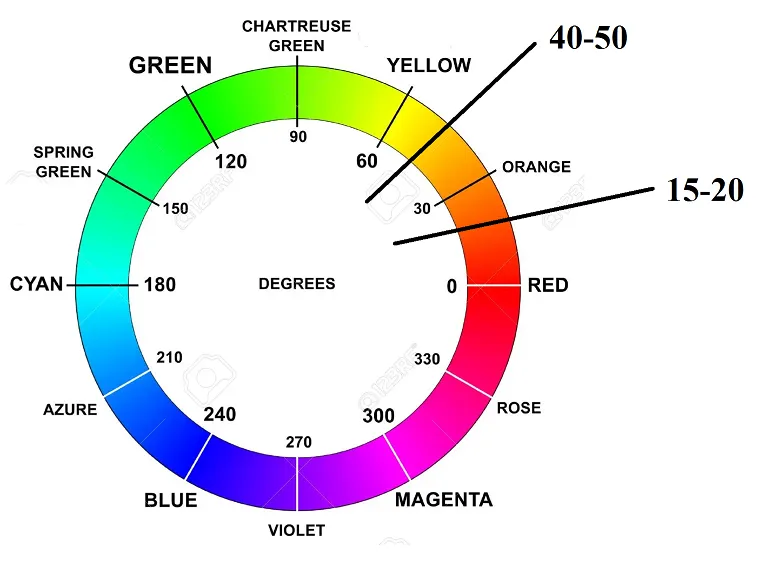

**Detecting Red**

*Binary Masking - Black & White*

HSV with Red Masking


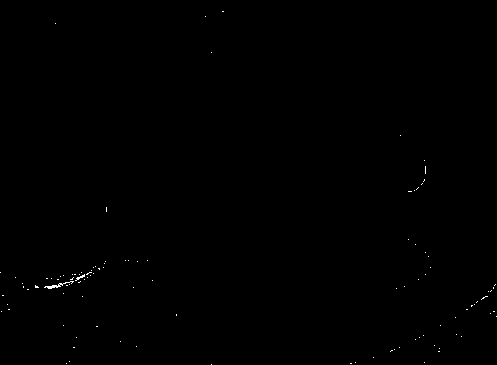

In [ ]:
from google.colab.patches import cv2_imshow

# Defining the boundaries of RED
Red_LL1=np.array([0,100,100]) # Lower Limit
Red_UL1=np.array([10,255,255]) # Upper Limit
Red_LL2=np.array([170,100,100])
Red_UL2=np.array([180,255,255])
mask1 =cv2.inRange(hsv_img,Red_LL1,Red_UL1) # Masking1
mask2 =cv2.inRange(hsv_img,Red_LL2,Red_UL2) # Masking2
red_binary_mask = cv2.bitwise_or(mask1, mask2)

# Displaying Result after Masking
print("HSV with Red Masking")
cv2_imshow(red_binary_mask)

*Not Binary Masking - Display Red*

HSV with Red Masking


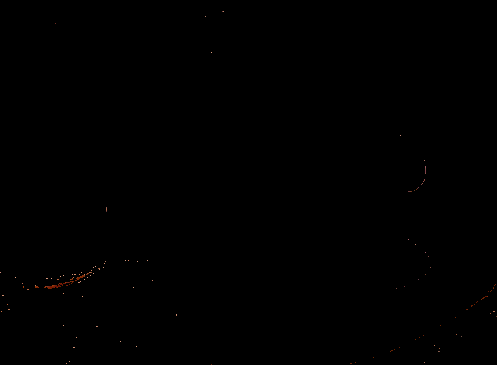

In [ ]:
# Defining the boundaries of RED
Red_LL1=np.array([0,100,100]) # Lower Limit
Red_UL1=np.array([10,255,255]) # Upper Limit
Red_LL2=np.array([170,100,100])
Red_UL2=np.array([180,255,255])
mask1 =cv2.inRange(hsv_img,Red_LL1,Red_UL1) # Masking1
mask2 =cv2.inRange(hsv_img,Red_LL2,Red_UL2) # Masking2
result1 = cv2.bitwise_and(bgr_img, bgr_img, mask=mask1)
result2 = cv2.bitwise_and(bgr_img, bgr_img, mask=mask2)

red_mask = cv2.bitwise_or(result1, result2)

# Displaying Result after Masking
print("HSV with Red Masking")
cv2_imshow(red_mask)

**Detecting Blue**

**IMPORTANT** :

❗❗❗

Mask is created from the HSV image but is is applied to the BGR image.

*Binary Masking - Black & White*

HSV with Blue Masking


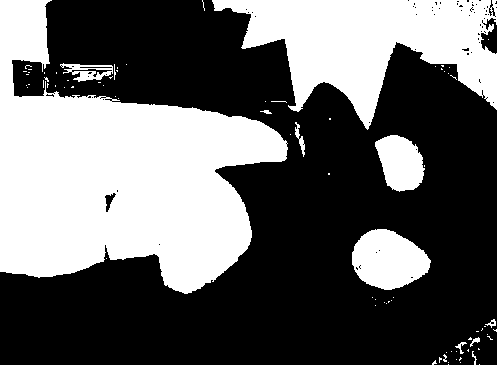

In [ ]:
# Defining the boundaries of BLUE
Blue_LL1=np.array([90,50,50]) # Lower Limit
Blue_UL1=np.array([130,255,255]) # Upper Limit
blue_binary_mask =cv2.inRange(hsv_img,Blue_LL1,Blue_UL1) # Masking1

# Displaying Result after Masking
print("HSV with Blue Masking")
cv2_imshow(blue_binary_mask)

*Not Binary Masking - Display Blue*

HSV with Blue Masking


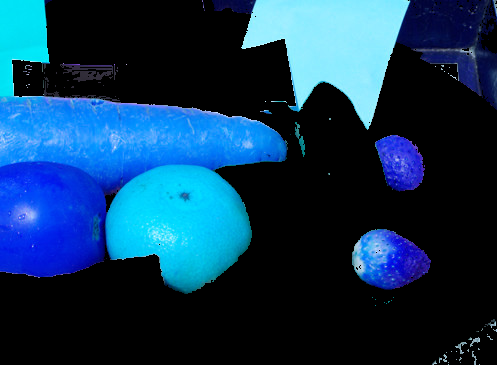

In [ ]:
# Defining the boundaries of BLUE
Blue_LL1=np.array([90,50,50]) # Lower Limit
Blue_UL1=np.array([130,255,255]) # Upper Limit
blue_mask =cv2.inRange(hsv_img,Blue_LL1,Blue_UL1) # Masking1

# Displaying Result after Masking
print("HSV with Blue Masking")
result = cv2.bitwise_and(bgr_img, bgr_img, mask=blue_mask)
cv2_imshow(result )



**Detecting Yellow**

*Binary Masking - Black & White*

HSV with Yellow Masking


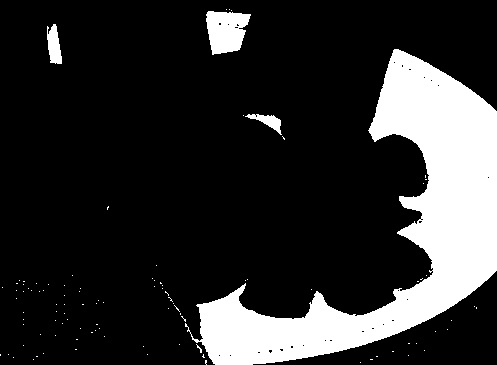

In [ ]:
# Defining the boundaries of YELLOW
Yellow_LL1=np.array([20,100,100]) # Lower Limit
Yellow_UL1=np.array([30,255,255]) # Upper Limit
yellow_binary_mask =cv2.inRange(hsv_img,Yellow_LL1,Yellow_UL1) # Masking1

# Displaying Result after Masking
print("HSV with Yellow Masking")
cv2_imshow(yellow_binary_mask)

*Not Binary Masking - Displaying Yellow*

HSV with Yellow Masking


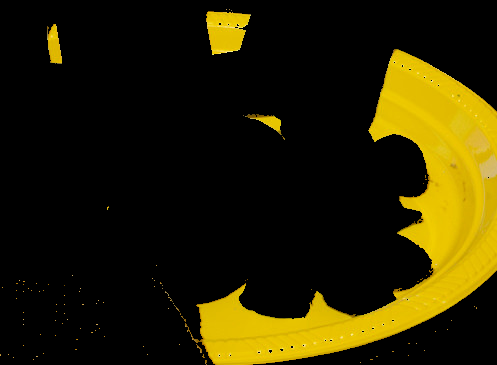

In [ ]:
# Defining the boundaries of YELLOW
Yellow_LL1=np.array([20,100,100]) # Lower Limit
Yellow_UL1=np.array([30,255,255]) # Upper Limit
yellow_mask =cv2.inRange(hsv_img,Yellow_LL1,Yellow_UL1) # Masking1
result = cv2.bitwise_and(bgr_img, bgr_img, mask=yellow_mask)
# Displaying Result after Masking
print("HSV with Yellow Masking")
cv2_imshow(result )

#**MORPHOLOGICAL OPERATIONS**

**Opening Mask**

\\

This is an operation that involves a kernel that slides through the black & white image, so the binary mask.

If all pixels scanned by the kernel in one pass are white the centerc stays white. Otherwise, if not all are white the center turns black.

The goal of **Mask Opening** is removing small noises (aka. small isolated white pixels) and smoothing object edges.

*This operation cleans the mask*

**Dilation**

\\

This is an operation that consists of the input : **binary mask** and the kernel, which is a small matrix  that is scanned (slides) over the binary mask (black & white image).

While sliding, if any pixel scanned by the kernel is white, the center pixel turns white. Otherwise, it stays as it is; black.

The goal of **Mask Dilation** is to expand the white parts/regions in the binary mask, thus smoothing edges, filling gaps and overall increasing the size of the detected features.

*This operation connects sepperated parts and expands the mask*

Original Binary Mask - Detecting Blue


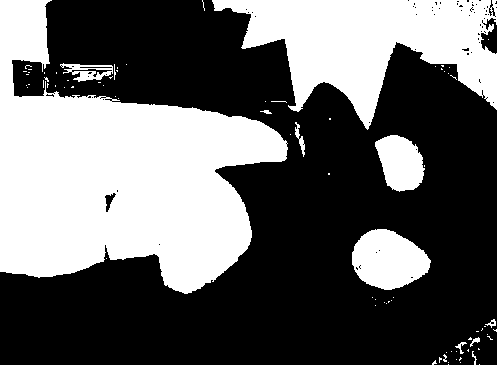


Mask after Opening


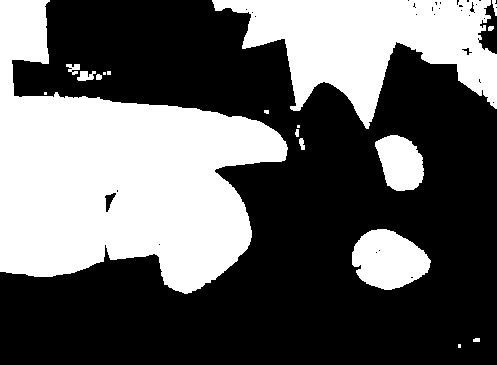


Mask after Dialation


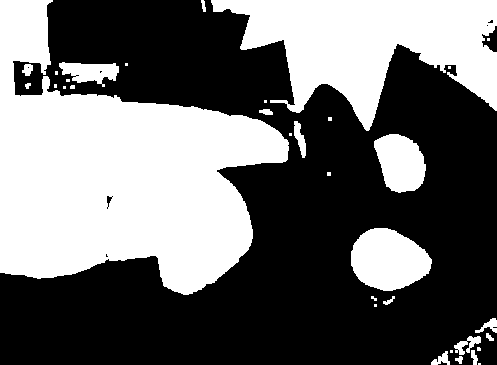

In [ ]:
from google.colab.patches import cv2_imshow
kernel= np.ones((3,3), np.uint8) # Define a 3x3 kernel
# Opening
opened_mask=cv2.morphologyEx(blue_binary_mask, cv2.MORPH_OPEN,kernel)
# Dialating
dilated_mask = cv2.dilate(blue_binary_mask, kernel, iterations=1)
# Displaying the Mask before and after these Operations
print("Original Binary Mask - Detecting Blue")
cv2_imshow(blue_binary_mask)
print("\nMask after Opening")
cv2_imshow(opened_mask)
print("\nMask after Dialation")
cv2_imshow(dilated_mask)

In order to costumize these operations for the masks which detected other colors, simply change "*blue_binary_mask*" to "*red_binary_mask*" or "*yellow_binatry_mask*". The rest of the code structure stays exactly the same.  

#**CONTOURS AND BOUNDING BOXES**

**Contours**

\\

They are curves that join with a line all continous points that share the same color or/and intensity. Contouring is applied to "highlight" or detect and objects shape.

**Bounding Boxes**

\\

They are rectangles that eclose the contoures/shape of an object. This is often used to localize objects or people (faces).

**IMPORTANT**

❗❗❗

Contour Detection should start with a grayscale image for better results.

The Shape Contouring in this Image


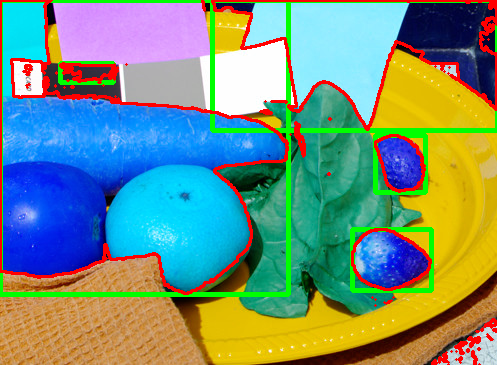

Image and and its Bounding Box


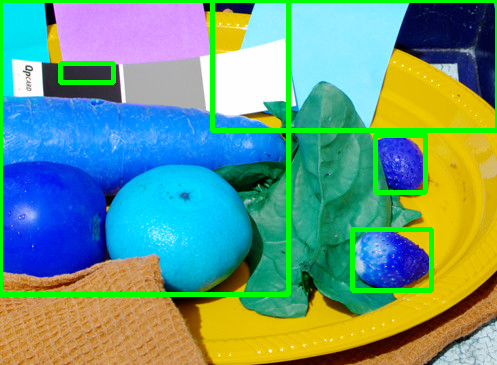

In [ ]:
# Find the Contours
contours, hierarchy= cv2.findContours(
    blue_binary_mask,  # Grayscale Image
    cv2.RETR_EXTERNAL, # Take most external contours
    cv2.CHAIN_APPROX_SIMPLE # Compress the contours
)
contour_img =bgr_img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 0, 255), 2)
# -1 : ContourID
# (0, 0, 255) :
# 2 : contour linbe thickness
print("The Shape Contouring in this Image")
cv2_imshow(contour_img)
for contour in contours:
  contourArea=cv2.contourArea(contour)
  if contourArea>500:
    x,y,w,h = cv2.boundingRect(contour) # Defining parameter of the Bounding box (e.g. w-width, h-height)
    cv2.rectangle(bgr_img,(x,y),(x+w,y+h),(0,255,0),3)
print("Image and and its Bounding Box" )
cv2_imshow(bgr_img)
